In [12]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

# Initialize Data

In [13]:
# Load Data
australian = pd.read_csv('2024-Australian Grand Prix-Race.csv')
british = pd.read_csv('2024-British Grand Prix-Race.csv')
dutch = pd.read_csv('2024-Dutch Grand Prix-Race.csv')
sao = pd.read_csv('2024-São Paulo Grand Prix-Race.csv')

In [14]:
# Organize Data (remove uneeded rows / columns)

drivers = ['SAI', 'LEC', 'PIA', 'TSU']

# Rows
australian = australian[australian.loc[:,'Driver'].isin(drivers)]
british = british[british.loc[:,'Driver'].isin(drivers)]
dutch = dutch[dutch.loc[:,'Driver'].isin(drivers)]
sao = sao[sao.loc[:,'Driver'].isin(drivers)]

# Columns
australian = australian.loc[:,['Driver', 'Compound','LapTime_in_seconds']]
british = british.loc[:,['Driver', 'Compound','LapTime_in_seconds']]
dutch = dutch.loc[:,['Driver', 'Compound','LapTime_in_seconds']]
sao = sao.loc[:,['Driver', 'Compound','LapTime_in_seconds']]

In [15]:
# Add Race Column
australian['Race'] = 'australian'
british['Race'] = 'british'
dutch['Race'] = 'dutch'
sao['Race'] = 'sao'

In [16]:
# Clean Data (deal with NaN)

# Fill NaN Compounds with the Most Common
australian =  australian.fillna(australian.loc[:,'Compound'].mode())
british = british.fillna(british.loc[:,'Compound'].mode())
dutch = dutch.fillna(dutch.loc[:,'Compound'].mode())
sao = sao.fillna(sao.loc[:,'Compound'].mode())

# Fill NaN Lap Times with the Mean
australian = australian.fillna(australian.loc[:,'LapTime_in_seconds'].mean())
british = british.fillna(british.loc[:,'LapTime_in_seconds'].mean())
dutch = dutch.fillna(dutch.loc[:,'LapTime_in_seconds'].mean())
sao = sao.fillna(sao.loc[:,'LapTime_in_seconds'].mean())

In [17]:
# Create Merged Dataframe
merged = pd.concat([australian, british], axis=0)
merged = pd.concat([merged, dutch], axis=0)
merged = pd.concat([merged, sao], axis=0)

# Visualization - Bar Plot

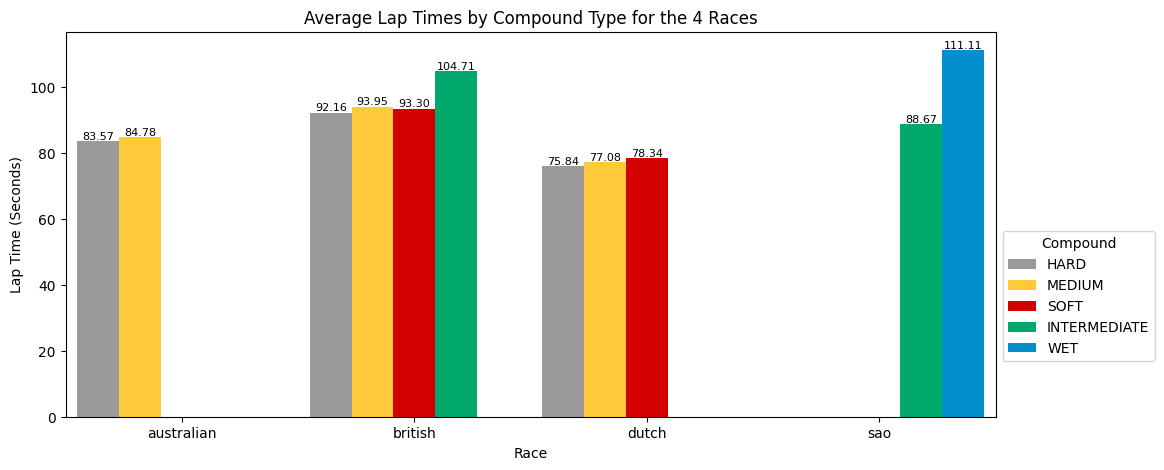

In [18]:
merged_pallet = {'SOFT': '#d30000', 'MEDIUM': '#ffca3a', 'HARD': '#9c999a', 'INTERMEDIATE': '#00a86b', 'WET': '#008ecc'}
barplot_order = ['HARD', 'MEDIUM', 'SOFT', 'INTERMEDIATE', 'WET']

fig, ax = plt.subplots(figsize=(12, 5))

bar = seaborn.barplot(data=merged, x='Race', y='LapTime_in_seconds', hue='Compound', estimator='mean', errorbar=None, width=0.9,
                hue_order=barplot_order, palette=merged_pallet, saturation=1)

# Display Values
bar.bar_label(ax.containers[0], fontsize=8, fmt='%.2f')
bar.bar_label(ax.containers[1], fontsize=8, fmt='%.2f')
bar.bar_label(ax.containers[2], fontsize=8, fmt='%.2f')
bar.bar_label(ax.containers[3], fontsize=8, fmt='%.2f')
bar.bar_label(ax.containers[4], fontsize=8, fmt='%.2f')

plt.xlabel('Race')
plt.ylabel('Lap Time (Seconds)')
plt.title('Average Lap Times by Compound Type for the 4 Races')
plt.legend(title='Compound', loc='best', bbox_to_anchor=(1, 0.5))

# Numerical Analysis

In [19]:
merged.groupby('Compound')['LapTime_in_seconds'].count()

,LapTime_in_seconds
Compound,
HARD,368
INTERMEDIATE,294
MEDIUM,262
SOFT,44
WET,4


In [20]:
merged.groupby(['Race','Compound'])['LapTime_in_seconds'].mean()

Race        Compound    
australian  HARD             83.573344
            MEDIUM           84.784814
british     HARD             92.157182
            INTERMEDIATE    104.708365
            MEDIUM           93.950123
            SOFT             93.296033
dutch       HARD             75.842321
            MEDIUM           77.084219
            SOFT             78.341571
sao         INTERMEDIATE     88.673717
            WET             111.111640
Name: LapTime_in_seconds, dtype: float64